In [1]:
%matplotlib inline

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from msslib.data import *
import functools as f

In [31]:
cent_10 = np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/nearest_centroid/results.npy")
cent_20 = np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/20blocks/nearest_centroid/results.npy")
LDA_cent_10 = np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/LDA_nearest_centroid/results.npy")
LDA_cent_20 = np.load("/home/finlay/HMT/data/VenetusA/1200Hx900W/20blocks/LDA_nearest_centroid/results.npy")

In [32]:
def normalise_confusion_matrix(cm: np.ndarray):
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(plt, score):
    c_m = normalise_confusion_matrix(score['c_matrix'])
    plt.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)

In [82]:
scores = []

In [83]:
naw = cent_10
aye = [y['c_matrix'] for y in naw]
wit = f.reduce(lambda x,y: x + y, aye)
scores.append({'label':"10px blocks", 'c_matrix': wit})

In [84]:
naw = cent_20
aye = [y['c_matrix'] for y in naw]
wit = f.reduce(lambda x,y: x + y, aye)
scores.append({'label':"20px blocks", 'c_matrix': wit})

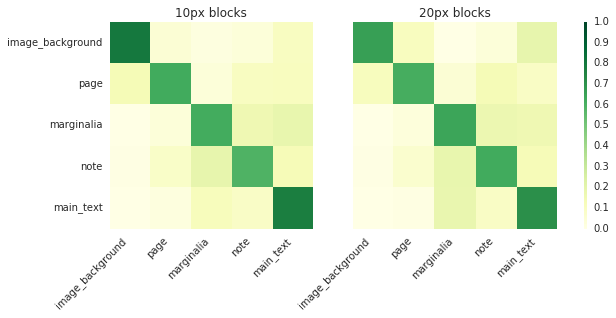

In [92]:
#mpl.use('pgf')
fig, axes = plt.subplots(1, 2, figsize=(10,3.7),sharex='col', sharey='row')

#tick_marks = np.arange(len(mss_labels))
axes[0].set_yticklabels(['']+mss_labels)
#axes[1].set_yticklabels(['']+mss_labels)
axes[0].set_xticklabels(['']+mss_labels,ha='right', rotation=45)
axes[1].set_xticklabels(['']+mss_labels,ha='right', rotation=45)

for a, s in zip(axes.flat, scores):
    a.set_title(s['label'])
    c_m = normalise_confusion_matrix(s['c_matrix'])
    a.grid(None)
    im = a.imshow(c_m, interpolation='nearest', cmap=plt.cm.YlGn, vmin=0, vmax=1)
    
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat], aspect=70)
plt.colorbar(im, cax=cax, **kw)

fig.savefig('/home/finlay/confusion.svg', layout='tight')

In [94]:
for i in cent_10:
    del i['c_matrix']

In [96]:
cent_10


array([ {'label': 'A', 'precision': 0.75897275857098134, 'fscore': 0.62601990274166741, 'recall': 0.57762610449735452},
       {'label': 'B', 'precision': 0.80876622020432165, 'fscore': 0.71598368973970805, 'recall': 0.68854206349206348},
       {'label': 'C', 'precision': 0.82479237979727427, 'fscore': 0.73806158757534512, 'recall': 0.71705726851851848},
       {'label': 'D', 'precision': 0.83349681356311756, 'fscore': 0.70384465836013332, 'recall': 0.6353192658730159},
       {'label': 'E', 'precision': 0.82788727927177697, 'fscore': 0.73696793979632458, 'recall': 0.6941417394179894},
       {'label': 'F', 'precision': 0.82738515474360963, 'fscore': 0.73365636088309705, 'recall': 0.7012080224867725}], dtype=object)

In [97]:
for i in cent_20:
    del i['c_matrix']

In [121]:
f_20 = np.around(np.mean([i['fscore'] for i in cent_20]), decimals=2)
p_20 = np.around(np.mean([i['precision'] for i in cent_20]), decimals=2)
r_20 = np.around(np.mean([i['recall'] for i in cent_20]), decimals=2)

In [122]:
for i in cent_20:
    print(i['label'], np.around(i['fscore'], decimals=2),
          np.around(i['precision'], decimals=2), 
    np.around(i['recall'], decimals=2))
print("Mean", f_20, p_20, r_20)

A 0.71 0.81 0.68
B 0.72 0.83 0.66
C 0.63 0.77 0.59
D 0.67 0.77 0.63
E 0.66 0.79 0.61
F 0.76 0.83 0.71
Mean 0.69 0.8 0.65


In [123]:
f_10 = np.around(np.mean([i['fscore'] for i in cent_10]), decimals=2)
p_10 = np.around(np.mean([i['precision'] for i in cent_10]), decimals=2)
r_10 = np.around(np.mean([i['recall'] for i in cent_10]), decimals=2)

In [124]:
for i in cent_10:
    print(i['label'], np.around(i['fscore'], decimals=2),
          np.around(i['precision'], decimals=2), 
    np.around(i['recall'], decimals=2))
print("Mean", f_10, p_10, r_10)

A 0.63 0.76 0.58
B 0.72 0.81 0.69
C 0.74 0.82 0.72
D 0.7 0.83 0.64
E 0.74 0.83 0.69
F 0.73 0.83 0.7
Mean 0.71 0.81 0.67


In [108]:
f_20, p_20, r_20

(0.69145157540112889, 0.80203137330130059, 0.6465526049382716)